## Eigenvalue experiment
- Seeing how the algorithm converges to eigenvalues 
- We take a 2-qubit unitary and try to run both the **original** method and the **modified** method with resolution = 40, error = 2.
- We want to know how the algorithms converge to unitaries as the iterations increase.

In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import random
from scipy.stats import unitary_group
import os
import numpy as np

In [3]:
from normal_SPEA import SPEA
from changed_SPEA import global_max_SPEA

### Defining the unitary matrix

In [76]:
unit = unitary_group.rvs(4)
unit

array([[ 0.29197397+0.23135047j, -0.36325818+0.16312474j,
         0.5564772 +0.20205637j, -0.35556066-0.47512622j],
       [ 0.23399064+0.36344211j,  0.7477677 +0.42324054j,
        -0.02471287+0.19606374j,  0.1233662 -0.14352068j],
       [ 0.14498482+0.64207265j, -0.0914436 -0.24029461j,
        -0.38771948-0.53980702j, -0.18726382-0.1543792j ],
       [ 0.48674088+0.0647441j , -0.19221369+0.00975621j,
         0.30045998-0.28010787j,  0.72347936+0.17231142j]])

### Generate the eigenvalues

In [77]:
# get the eigenvalues and eigenstates
eig_v, eig_vect = np.linalg.eig(unit)
eig_v = np.angle(eig_v)
eig = []
for k in eig_v:
    if k < 0:
        e = (k+2*np.pi)/(2*np.pi)
    else:
        e = (k)/(2*np.pi)
    eig.append(e)
eig_v = np.array(eig)
print("Eigenvalues :", eig_v)
print("Eigenstates :", eig_vect)

Eigenvalues : [0.64453798 0.93013016 0.21193698 0.08871061]
Eigenstates : [[-0.36365241+0.2110998j   0.19701118-0.51771608j  0.71779811+0.j
   0.01613957-0.0292548j ]
 [ 0.03119405-0.10302775j  0.18535327+0.36221103j  0.23806696-0.30949427j
   0.81877773+0.j        ]
 [ 0.89508922+0.j          0.22411592-0.12139663j  0.30014677+0.14072831j
  -0.06520854-0.14037628j]
 [ 0.01744472+0.10058317j  0.68017564+0.j         -0.18175045-0.43517529j
  -0.25363363+0.49010103j]]


### Generate the basis we provide

In [78]:
sample = unitary_group.rvs(4)
basis = []
for k in sample:
    basis.append(k)
basis_ind = np.random.choice(range(4))
print("Basis :", basis)
print("Basis index :", basis_ind)

Basis : [array([-0.29062916+0.18544954j, -0.47312897-0.0834948j ,
        0.51494952+0.2945805j , -0.54441364+0.04454046j]), array([ 0.31354407-0.5655097j ,  0.09696866-0.48891477j,
        0.49319566-0.27593224j, -0.04306749+0.11051224j]), array([ 0.49630394+0.05018374j, -0.67407544-0.16269674j,
       -0.12987348+0.27347375j,  0.39937059+0.13843475j]), array([ 0.13626847-0.44229734j,  0.0140701 +0.19922633j,
       -0.42193096+0.24287447j, -0.49157448+0.51696775j])]
Basis index : 0


### Utils

In [7]:
def generate_plot1(actual_E, returned_E, experiments):
    colors = ['blue', 'grey', 'orange', 'red',
              'green', 'brown', 'magenta', 'pink']

    plt.figure(figsize=(9, 7))
    plt.scatter(range(experiments), returned_E, marker='s', color=np.random.choice(colors),
                alpha=0.8)
    for k in actual_E:
        plt.plot([0, experiments], [k, k], color='black',
                 linewidth=2, label='Actual Values')
    plt.xlabel("Experiment Number", fontsize=14)
    plt.ylabel("Eigenvalues", fontsize=14)
    plt.title("Scatter plot for returned eigenvalues", fontsize=17)
    plt.legend()
    plt.grid()

### Keeping  everything constant and running the algorithm
- Let us try to test the new parameters of *theta_min* and *theta_max* to constrain the values
- The basis vectors provided are the same

- Algorithm 1

In [79]:
spea1 = SPEA(unit, resolution=30, error=2, max_iters=12)
simulator = Aer.get_backend('qasm_simulator')

In [80]:
eigen_vals_ret1 = []
while len(eigen_vals_ret1) != 20:
    res = spea1.get_eigen_pair(
        backend=simulator, algo='alternate', theta_left=0.6, theta_right=0.73, basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue
    print(res)

    eigen_vals_ret1.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.7734375, 'theta': 0.73, 'state': array([-0.12706027+0.40757669j, -0.24832856-0.258307j  ,
        0.45960303+0.36208103j, -0.56900713+0.15244874j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.775390625, 'theta': 0.73, 'state': array([-0.08713079+0.45099415j, -0.18920886-0.29689597j,
        0.43174944+0.36598931j, -0.5600231 +0.17630561j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.751953125, 'theta': 0.73, 'state': array([-0.20015118+0.27530682j, -0.26519436-0.33095373j,
        0.39181677+0.48194386j, -0.56400526-0.01987561j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.771484375, 'theta': 0.73, 'state': array([-0.16373107+0.32292056j, -0.27228573-0.26169236j,
        0.45276117+0.43771451j, -0.57223533+0.0474562

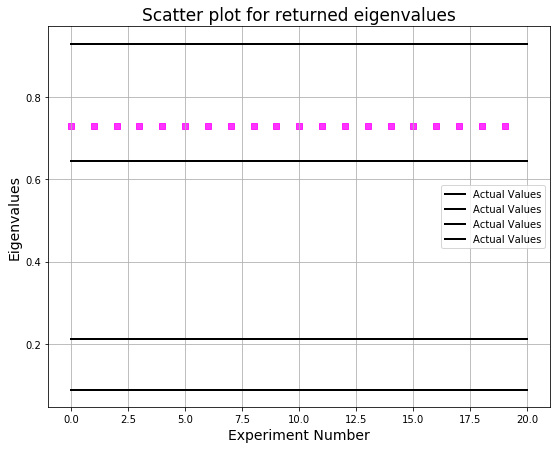

In [81]:
generate_plot1(eig_v, eigen_vals_ret1, 20)

- Algorithm 2

In [82]:
spea2 = global_max_SPEA(unit, resolution=30, error=2, max_iters=12)
simulator = Aer.get_backend('qasm_simulator')

In [83]:
eigen_vals_ret2 = []
while len(eigen_vals_ret2) != 20:
    res = spea2.get_eigen_pair(
        backend=simulator, algo='alternate', theta_left=0.6, theta_right=0.73, basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue
    print(res)
    eigen_vals_ret2.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.75390625, 'theta': 0.73, 'state': array([-0.05936643+0.35103081j, -0.20426784-0.20270321j,
        0.41720407+0.4266517j , -0.62580632+0.2066751j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.759765625, 'theta': 0.73, 'state': array([-0.13499328+0.46520731j, -0.20898593-0.36317427j,
        0.37623927+0.30812649j, -0.55435553+0.21443024j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.763671875, 'theta': 0.73, 'state': array([-0.05002935+0.33699224j, -0.20915147-0.29696942j,
        0.53340356+0.35203405j, -0.5655985 +0.15378273j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.

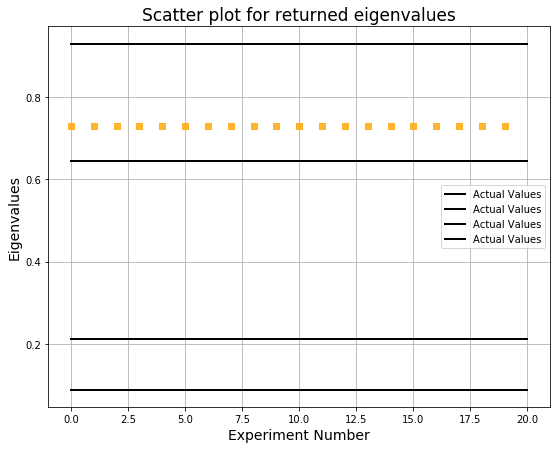

In [84]:
generate_plot1(eig_v, eigen_vals_ret2, 20)

## Giving random basis vectors

In [85]:
spea1 = SPEA(unit, resolution=30, error=2, max_iters=12)
simulator = Aer.get_backend('qasm_simulator')

In [86]:
eigen_vals_ret1_r = []
while len(eigen_vals_ret1_r) != 20:
    res = spea1.get_eigen_pair(
        backend=simulator, algo='alternate', theta_left=0.6, theta_right=0.73)
    if res['cost'] < 0.75:
        continue
    print(res)

    eigen_vals_ret1_r.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.951171875, 'theta': 0.69775390625, 'state': array([-0.00079628-0.29369487j,  0.06707962-0.11701427j,
       -0.52940852+0.73153315j, -0.28076539-0.03615715j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.755859375, 'theta': 0.73, 'state': array([ 0.71372928+0.22922621j, -0.34936347+0.29579997j,
       -0.02758802-0.28969774j,  0.02139754+0.37861545j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.94921875, 'theta': 0.6752311236623068, 'state': array([0.07489672+0.2196589j , 0.09312764+0.01217499j,
       0.2216258 -0.8880229j , 0.31501798+0.01950531j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.9375, 'theta': 0.6737904094827587, 'state': array([-0

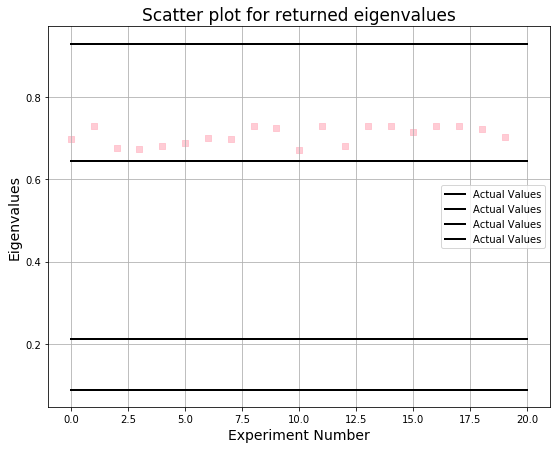

In [87]:
generate_plot1(eig_v, eigen_vals_ret1_r, 20)

- Algorithm 2

In [88]:
spea2 = global_max_SPEA(unit, resolution=30, error=2, max_iters=12)
simulator = Aer.get_backend('qasm_simulator')

In [89]:
eigen_vals_ret2_r = []
while len(eigen_vals_ret2_r) != 20:
    res = spea2.get_eigen_pair(
        backend=simulator, algo='alternate', theta_left=0.6, theta_right=0.73, basis=basis,
        basis_ind=basis_ind)
    if res['cost'] < 0.75:
        continue
    print(res)
    eigen_vals_ret2_r.append(res['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.771484375, 'theta': 0.73, 'state': array([-0.09224203+0.42194004j, -0.2136573 -0.25345189j,
        0.46400429+0.38225855j, -0.56526459+0.15041634j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.771484375, 'theta': 0.73, 'state': array([-0.1461592 +0.37686058j, -0.28131964-0.22630821j,
        0.47948997+0.36319976j, -0.57161636+0.13299432j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.76171875, 'theta': 0.73, 'state': array([-0.28411461+0.38015643j, -0.35784374-0.36417172j,
        0.34818518+0.21056202j, -0.55124063+0.2113085j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
{'cost': 0.7578125, 'theta': 0.73, 'state': array([-0.08364058+0.34990405j, -0.2680638 -0.14350343j,
        0.52357443+0.4024645j , -0.58059197+0.07017898

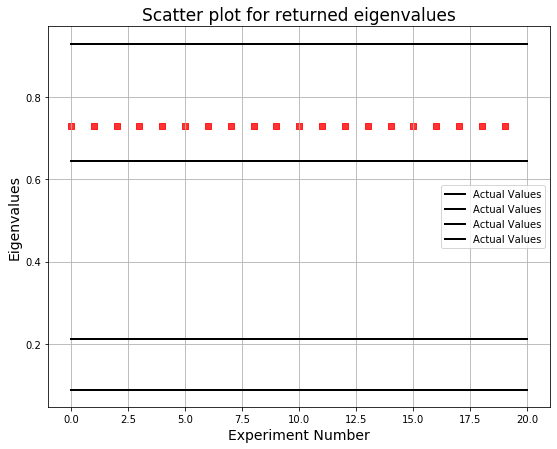

In [90]:
generate_plot1(eig_v, eigen_vals_ret2_r, 20)

### Variance of global_max is lesser

In [91]:
v1 = np.var(eigen_vals_ret1_r)
v2 = np.var(eigen_vals_ret2_r)
print("VARIANCE \nOriginal approach :",v1,"\nModified approach :",v2)

VARIANCE 
Original approach : 0.0004740016476921365 
Modified approach : 1.232595164407831e-32


### Build Min Eigensolver
- Provide a step size to use
- Provide a minimum threshold to use
- If the threshold is met, we return the eigenvalues discovered, else we continue our search.
- Each step uses **exp** number of experiments and tries to evaluate eigenvalues using the SPEA method

In [98]:
def min_eigensolver(unitary, step_size, algo, experiments=20, min_threshold=0.9):

    # generate the steps
    steps = np.arange(0, 1 + 1e-12, step_size)
    if steps[-1] != 1:
        steps = np.append(steps, 1)
    print("Steps :", steps)
    if algo == 0:
        spe = SPEA(unitary, resolution=40, error=2, max_iters=12)
    else:
        spe = global_max_SPEA(unitary, resolution=40, error=2, max_iters=12)
    # start the experiments
    for i in range(len(steps) - 1):
        left = steps[i]
        right = steps[i+1]
        costs , eigs = [], []
        for _ in range(experiments):
            res = spe.get_eigen_pair(
                backend=simulator, theta_left=left, theta_right=right,
                randomize=True) 
            costs.append(res['cost'])
            eigs.append(res['theta'])
        
        if np.average(costs) > min_threshold:
            return (np.average(costs),eigs) 
        

In [102]:
res1 = min_eigensolver(unit,0.1,algo = 0,experiments=15,min_threshold=0.85)
res2 = min_eigensolver(unit,0.1,algo = 1,experiments=15,min_threshold=0.85)

Steps : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum it

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algor

In [104]:
res1 